In [ ]:
import torch
from torch import nn # importing the neural network library
from torch.utils.data import DataLoader # creates the entier data into batches
'''
Gradient descent = All the datapoints - compute output - compute loss - gradient descent
Stochastic Gradient Descent = Single datapoint - compute output - compute loss
                                  - gradient descent - next data point
Mini batch Gradient Descent = create bathes of data - compute output foe each batch -
                                - gradinet descent - next batch
'''
from torchvision import datasets # download the dataset
from torchvision.transforms import ToTensor # is used to convert the input to torch tensor format
import matplotlib.pyplot as plt
import torch.nn.functional as F

### Downloading the dataset

In [ ]:
train_data = datasets.FashionMNIST(root ='data',train =True,download =True,transform =ToTensor())
test_data = datasets.FashionMNIST(root ='data',train =False,download =True,transform =ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 12812699.81it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201163.94it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3767969.22it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6135912.76it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



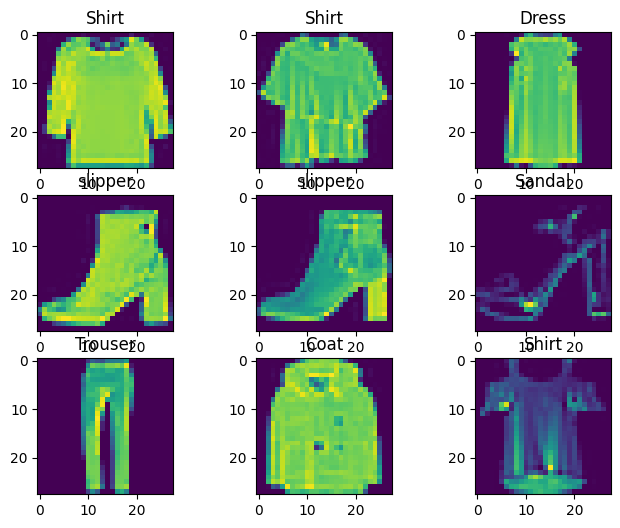

In [ ]:
labels_map = {
    0: "sweat_shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "slipper",
}

figure= plt.figure(figsize=(8,6))
cols,rows=3,3

for i in range(1,rows*cols+1):
  sample_idx = torch.randint(len(train_data),size=(1,)).item()
  img, label = train_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.imshow(img.squeeze())
# for over

In [ ]:
torch.randint(len(train_data),size=(1,)).item()

21565

In [ ]:
len(train_data)

60000

### Batching

In [ ]:
batch_size = 64

train_dataloader = DataLoader(train_data,batch_size=batch_size)
test_dataloader = DataLoader(test_data,batch_size=batch_size)

### Model  Creation

In [ ]:
class NeuralNetwork(nn.Module):

  def __init__(self):
    super(NeuralNetwork,self).__init__() # Init function is used to define the architecture blocks

    ## creating multi-layers in the architecture
    self.flatten = nn.Flatten() # (28 x 28 x 1) - (784 x 1) vector
    self.layer1 = nn.Linear(784,512)
    self.dropout1=nn.Dropout(0.4)
    self.layer2 = nn.Linear(512,256)
    self.dropout2=nn.Dropout(0.3)
    self.layer3 = nn.Linear(256,10)

  def forward(self,x):
    x = self.flatten(x)
    x = self.layer1(x)
    x = self.dropout1(x)
    x = F.relu(x)
    x = self.layer2(x)
    x = self.dropout2(x)
    x = F.sigmoid(x)
    x = self.layer3(x)
    x = F.softmax(x)
    return x

# device to run in either gpu or cpu
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

# model to the device
model = NeuralNetwork()
model.to(device)
model

# loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-2)

### Training the model

In [ ]:
def training_loop(train_dataloader,model,loss_,optimizer):

  #pass every batch of data to the model
  for batch, (X,y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
    loss = loss_fn(pred,y)
    optimizer.zero_grad() #
    loss.backward()
    optimizer.step()


    #train_loss+=loss.item()
    if batch% 100 ==0:
      print(f'loss:{loss.item()}')

### Testing the  model

In [ ]:
def testing_loop(test_dataloader,model,loss_):
## testing the model
  model.eval()
  test_loss = 0.0
  correct = 0
  for X,y in test_dataloader:
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
  test_loss += loss_fn(pred,y).item()
  average_loss = test_loss/len(test_dataloader)

  print(f'Test Loss: {average_loss:.4f}')

In [ ]:
epochs = 10 #how many times you have to send data to the model
i=1
for t in range(epochs):
  training_loop(train_dataloader,model,loss_fn,optimizer)
  testing_loop(test_dataloader,model,loss_fn)
  print(f' ==================== EPOCH : {t} ============================')

<ipython-input-11-7609b44f4341>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


loss:2.302381992340088
loss:2.3024649620056152
loss:2.3013556003570557
loss:2.301193952560425
loss:2.3007144927978516
loss:2.303025245666504
loss:2.30228328704834
loss:2.3044095039367676
loss:2.300708293914795
loss:2.298841714859009
Test Loss: 0.0147
 ==================== EPOCH : 0 ============================
loss:2.301295280456543
loss:2.3011584281921387
loss:2.3003592491149902
loss:2.299919843673706
loss:2.2992358207702637
loss:2.3006575107574463
loss:2.299180269241333
loss:2.3009204864501953
loss:2.299203395843506
loss:2.2953996658325195
Test Loss: 0.0147
 ==================== EPOCH : 1 ============================
loss:2.2997875213623047
loss:2.299727201461792
loss:2.298780679702759
loss:2.298274517059326
loss:2.2960989475250244
loss:2.2977256774902344
loss:2.2951500415802
loss:2.2971885204315186
loss:2.2965285778045654
loss:2.289628744125366
Test Loss: 0.0146
 ==================== EPOCH : 2 ============================
loss:2.2976224422454834
loss:2.297677516937256
loss:2.2964243